In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
os.getcwd()
os.chdir("/home/mbilkis/Desktop/qmon-sindy") ### garantizarte que estás en la branch fisher !!
from numerics.utilities.misc import *
import matplotlib.pyplot as plt 
from numerics.NN.models.normal import *
from numerics.NN.misc import * 
import torch
import numpy as np
from scipy.linalg import solve_continuous_are
from tqdm import tqdm

In [6]:
mode = "normal"
itraj = 2
states = load_data(itraj=itraj, what="hidden_state.npy",mode=mode)
x, x_th = states[:,:2], states[:,2:]
dy = load_data(itraj=itraj,what="dys.npy",mode=mode)
####
params, exp_path = give_params(mode=mode)
gamma, omega, n, eta, kappa, params_force, [periods, ppp] = params
period = (2*np.pi/omega)
total_time = period*periods
dt = period/ppp
times = np.arange(0,total_time+dt,dt)
###

[]

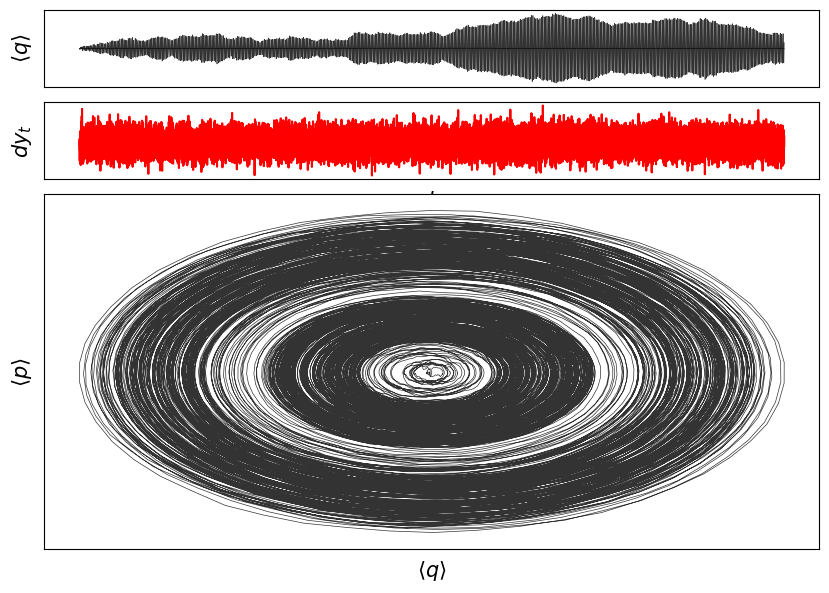

In [7]:
SS=15
fig=plt.figure(figsize=(10,7))
fig.tight_layout()
#ax=plt.subplot(111)
ax=plt.subplot2grid((6,1),(0,0))
ax.plot(times,x[:,0],color="black", linewidth=0.5, alpha=0.8)
ax.plot(times,x_th[:,0],color="black", linewidth=0.5, alpha=0.8)

ax.set_ylabel(r'$\langle q\rangle$',size=SS)
ax.set_xticks([])
ax.set_yticks([])

ax=plt.subplot2grid((6,1),(1,0))
ax.plot(times,dy[:,0], color="red")
ax.set_ylabel(r'$dy_t$',size=SS)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel(r'$t$',size=SS)

ax=plt.subplot2grid((6,1),(2,0),rowspan=4)
ax.plot(x[:,1],x[:,0], color="black", linewidth=0.5, alpha=0.8)
ax.set_xlabel(r'$\langle q\rangle$',size=SS)
ax.set_ylabel(r'$\langle p\rangle$',size=SS)
ax.set_xticks([])
ax.set_yticks([])

#os.makedirs("results/",exist_ok=True)
#plt.savefig("results/talk.png")

In [4]:
from numerics.NN.models.normal import *

In [ ]:
x = load_data(itraj=itraj, what="hidden_state.npy", mode=mode)
dy = load_data(itraj=itraj,what="dys.npy", mode=mode)

####
params, exp_path = give_params(mode=mode)
gamma, omega, n, eta, kappa, b, [periods, ppp] = params
period = (2*np.pi/omega)
total_time = period*periods
dt = period/ppp
times = np.arange(0,total_time+dt,dt)
###

inputs_cell = [dt,  [gamma, omega, n, eta, kappa, b], omega + np.random.randn()*0.05*omega]


[]

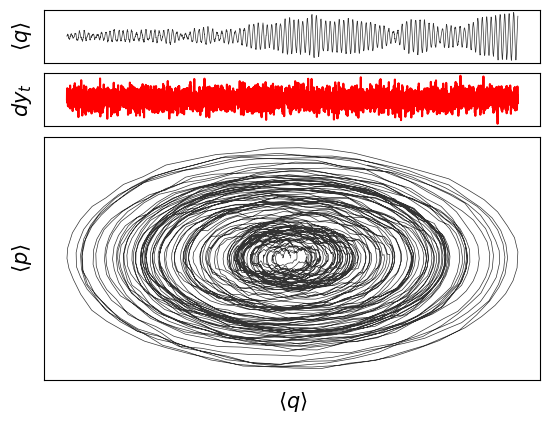

In [5]:
from lmfit.models import LorentzianModel

In [25]:
mode = "normal"
itraj = 1
x = load_data(itraj=itraj, what="hidden_state.npy",mode=mode)
dy = load_data(itraj=itraj,what="dys.npy",mode=mode)
####
params, exp_path = give_params(mode=mode)
gamma, omega, n, eta, kappa, params_force, [periods, ppp] = params
period = (2*np.pi/omega)
total_time = period*periods
dt = period/ppp
times = np.arange(0,total_time+dt,dt)
###

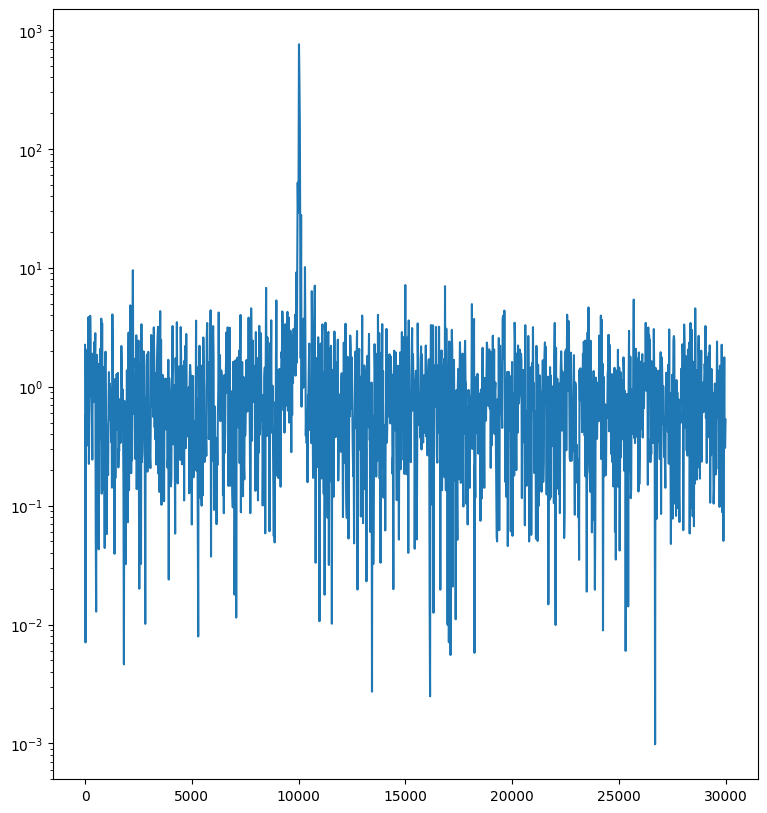

In [26]:
signals = dy[:,0]


Period = 2*np.pi/omega
spectra_signal = np.abs(np.fft.fft(signals))**2/times[-1]
freqs_signal = np.fft.fftfreq(n = len(spectra_signal), d= dt)*(2*np.pi)

cutoff = 3*omega 
cond  = np.logical_and(freqs_signal < cutoff, freqs_signal>=0)
spectra_signal = spectra_signal[cond]
freqs_signal = freqs_signal[cond]

plt.figure(figsize=(20,10))
ax = plt.subplot(121)
ax.plot(freqs_signal, spectra_signal)
ax.set_yscale("log")

In [27]:
cutoff = 10*omega 
cond  = np.logical_and(freqs_signal < cutoff, freqs_signal>=0)
spectra_signal = spectra_signal[cond]
freqs_signal = freqs_signal[cond]


mod = LorentzianModel()

pars = mod.guess(spectra_signal, x=freqs_signal)
pars["amplitude"].value = np.max(spectra_signal)
pars["sigma"].value = 2*omega#np.max(spectra_signal)
out = mod.fit(spectra_signal, pars, x=freqs_signal)

def lorentzian_fit(x, out):
    A, x0, sigma, fhwm, height = list(out.values.values())
    return (A/np.pi)*(sigma/((x-x0)**2 + sigma**2))
